In [5]:
import numpy as np
import matplotlib.pyplot as plt

# set random seed for reproducibility
np.random.seed(42)

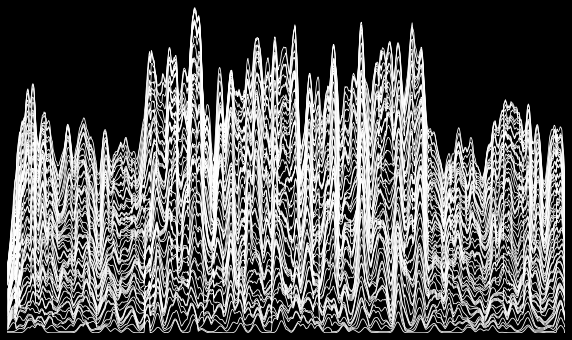

In [7]:
num_lines = 60
num_samples = 1000
peak_spread = 50
peak_height = 2.5

vertical_spacing = 0.3  # reduced spacing for a compact overlay effect

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# center region where peaks will be more pronounced
center_region = (num_samples // 4, 3 * num_samples // 4)

# base line for accumulation
accumulated_line = np.zeros(num_samples)

# line from bottom to top
for i in range(num_lines):
    x = np.linspace(0, num_samples, num_samples)
    y = np.zeros_like(x)

    # peak gen
    for j in range(len(x)):
        peak_probability = 0.05
        if np.random.rand() < peak_probability:
            peak_width = np.random.randint(5, peak_spread)
            height = (np.random.rand() * peak_height) * (1.5 if center_region[0] <= j <= center_region[1] else 1.0)
            peak = height * np.exp(-0.5 * (np.arange(-peak_width, peak_width) / 5)**2)
            start = max(0, j - peak_width)
            end = min(num_samples, j + peak_width)
            y[start:end] = np.maximum(y[start:end], peak[:end-start])

    accumulated_line += y

    ax.plot(x, accumulated_line + (i * vertical_spacing), color='white', linewidth=0.8)

# set limits to fit entire set of lines
ax.set_xlim(0, num_samples)
ax.set_ylim(0, num_lines * vertical_spacing + np.max(accumulated_line))

# remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])

# Remove axis spines
for spine in ax.spines.values():
    spine.set_visible(False)

# set aspect of the plot to be equal
ax.set_aspect('auto')

plt.show()


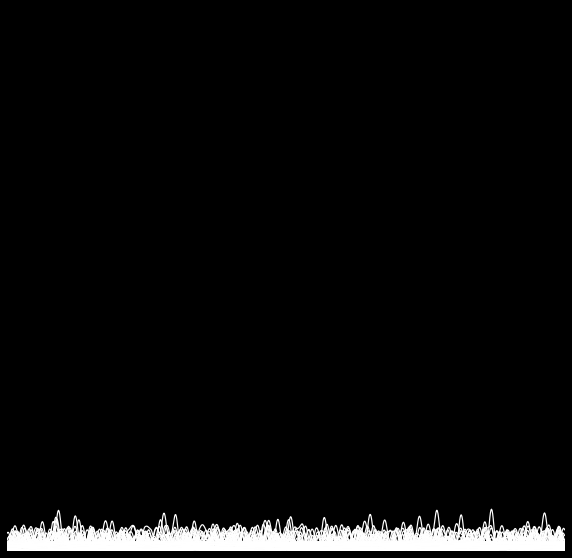

In [61]:
# constant shits, and to create figure and axis with a black background
num_lines = 60
num_samples = 1000
peak_spread = 20
max_peak_height = 30

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# generate each line
for i in range(num_lines):
    # generate a baseline with zeros
    y = np.zeros(num_samples)

    # add peaks at random intervals
    peak_positions = np.random.choice(num_samples, num_lines//3, replace=False)
    peak_values = np.random.rand(num_lines//3) * max_peak_height
    y[peak_positions] = peak_values

    # smooth the peaks to create a mountain-like shape
    y = np.convolve(y, np.hanning(peak_spread), mode='same')

    # offset each line vertically
    y_offset = i * (max_peak_height / 2) / num_lines
    y += y_offset

    # plot the line with a white color
    ax.plot(y, color='white', linewidth=1.2)

# set the x and y limits to create padding and display only the "mountainous" part
ax.set_xlim(0, num_samples)
ax.set_ylim(0, y_offset * num_lines)

# remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])

# remove axis spines
for spine in ax.spines.values():
    spine.set_visible(False)

# ensure the plot maintains its aspect ratio
ax.set_aspect(aspect='auto')

plt.show()

In [62]:
output_file = '1.png'
fig.savefig(output_file, dpi=300, bbox_inches='tight', pad_inches=0.1, facecolor='black')

plt.close(fig)

output_file

'1.png'

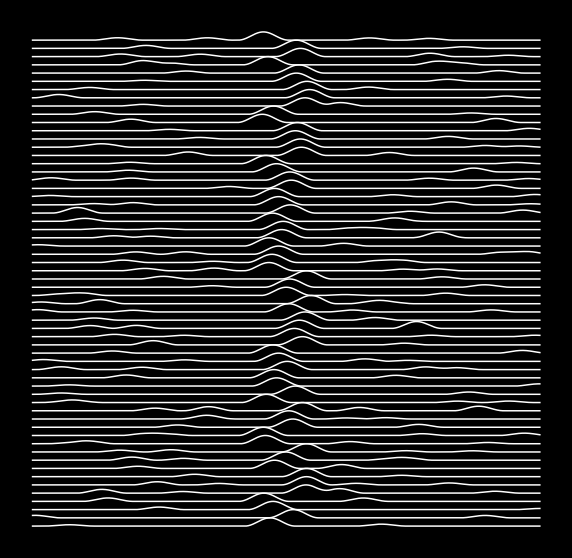

In [63]:
# constants for the generation
num_lines = 60
num_samples = 1000
peak_spread = 50

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# generate each line
for i in range(num_lines):
    # generate x values
    x = np.linspace(0, num_samples, num_samples)

    # start with a base line at current level
    y = np.zeros_like(x)

    # add central peak
    center_peak = np.random.randint(low=num_samples // 2 - peak_spread, high=num_samples // 2 + peak_spread)
    y[center_peak] = np.random.uniform(low=0.5, high=1.0) * (num_lines - i)

    # add smaller random peaks on each side
    for _ in range(np.random.randint(1, 3)):  # for the number of additional peaks
        left_peak = np.random.randint(low=0, high=num_samples // 2 - peak_spread * 2)
        right_peak = np.random.randint(low=num_samples // 2 + peak_spread * 2, high=num_samples)
        y[left_peak] = np.random.uniform(low=0.1, high=0.3) * (num_lines - i)
        y[right_peak] = np.random.uniform(low=0.1, high=0.3) * (num_lines - i)

    # smooth the line, make it more like mountain ridge
    y = np.convolve(y, np.hanning(peak_spread * 2), mode='same')
    
    # normalize and apply vertical offset
    y = y / np.max(y) * 0.3 + i * 0.3
    
    ax.plot(x, y, color='white', linewidth=1.5)

# remove axis labels, ticks
ax.set_xticks([])
ax.set_yticks([])

# remove axis spines
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

In [64]:
output_file = '2.png'
fig.savefig(output_file, dpi=300, bbox_inches='tight', pad_inches=0.1, facecolor='black')

plt.close(fig)

output_file

'2.png'

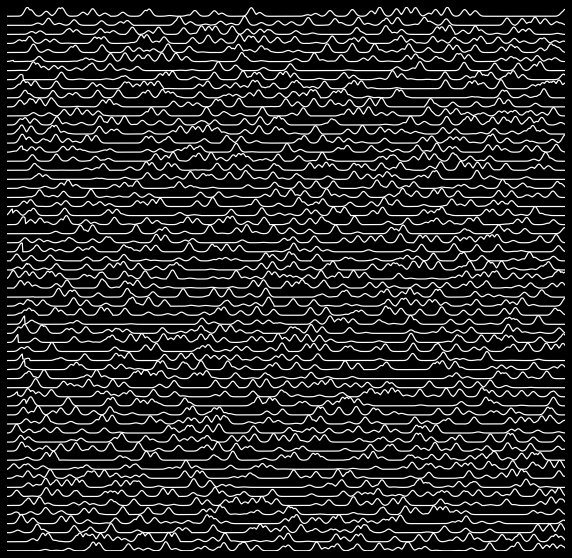

In [84]:
# constants
num_lines = 60
num_samples = 1000
peak_spread = 50
peak_height = 2.5 

# new addition to the constants: some adjustments for normalization and vertical offset
vertical_offset = 0.5
vertical_spacing = 1.5

# create a figure and axis with a black background
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

for i in range(num_lines):
    # generate x values
    x = np.linspace(0, num_samples, num_samples)

    # start with a base line at current level
    y = np.zeros_like(x)

    # create random peaks at different locations with varying heights
    for j in range(len(x)):
        if np.random.rand() < 0.05:  # 5% chance to create a peak
            peak_width = np.random.randint(10, peak_spread)
            height = np.random.rand() * peak_height
            peak = height * np.exp(-0.5 * (np.arange(-peak_width, peak_width) / 5)**2)
            start = max(0, j - peak_width)
            end = min(num_samples, j + peak_width)
            y[start:end] = np.maximum(y[start:end], peak[0:end-start])

    # normalize peaks to have same spawn point
    y = (y / np.max(y)) * vertical_spacing + (i * vertical_spacing)

    ax.plot(x, y, color='white', linewidth=1.2)

# set the limits to fit the entire set of lines
ax.set_xlim(0, num_samples)
ax.set_ylim(0, num_lines * vertical_spacing)

ax.set_xticks([])
ax.set_yticks([])

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_aspect('auto')

plt.show()

In [85]:
output_file = '3.png'
fig.savefig(output_file, dpi=300, bbox_inches='tight', pad_inches=0.1, facecolor='black')

plt.close(fig)

output_file

'3.png'

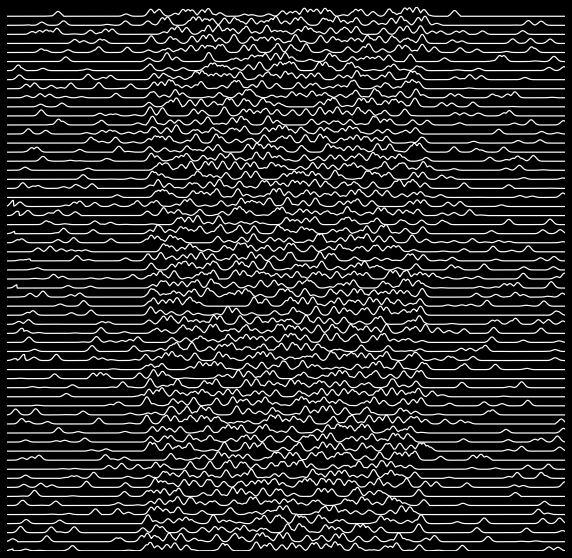

In [80]:
# centralized version
num_lines = 60
num_samples = 1000
peak_spread = 50
peak_height = 2.5  

vertical_offset = 0.5
vertical_spacing = 1.5

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# define center region where peaks will be more likely and higher
center_region = (num_samples // 4, 3 * num_samples // 4)


for i in range(num_lines):
    x = np.linspace(0, num_samples, num_samples)

    y = np.zeros_like(x)

    # i changed something ehre, particularly adjusted peak generation based on position
    for j in range(len(x)):
        # increase probability of a peak occurring in the center region and decreases it outside this region
        if (j < center_region[0] or j > center_region[1]):
            peak_probability = 0.02  # lower probability outside center region
        else:
            peak_probability = 0.1  # higher probability within center

        # peak heights are more varied
        if np.random.rand() < peak_probability:
            peak_width = np.random.randint(10, peak_spread)
            # peaks within the center region can be up to 1.5 times taller than those outside this region.
            height = (np.random.rand() * peak_height) * (1.5 if j in range(*center_region) else 1.0)
            peak = height * np.exp(-0.5 * (np.arange(-peak_width, peak_width) / 5)**2)
            start = max(0, j - peak_width)
            end = min(num_samples, j + peak_width)
            y[start:end] = np.maximum(y[start:end], peak[0:end-start])

    # alternatively, this is crazier:
    # y = y - np.min(y) + (vertical_spacing * i)
    y = (y / np.max(y)) * vertical_spacing + (i * vertical_spacing)
    ax.plot(x, y, color='white', linewidth=1.2)

ax.set_xlim(0, num_samples)
ax.set_ylim(0, num_lines * vertical_spacing)

ax.set_xticks([])
ax.set_yticks([])

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_aspect('auto')

plt.show()

In [81]:
output_file = '4-non-crazier.png'
fig.savefig(output_file, dpi=300, bbox_inches='tight', pad_inches=0.1, facecolor='black')

plt.close(fig)

output_file

'4-non-crazier.png'

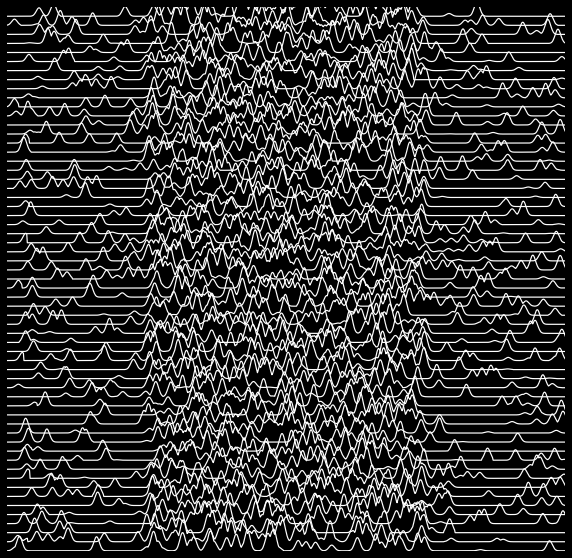

In [4]:
# centralized version
num_lines = 60
num_samples = 1000
peak_spread = 50
peak_height = 2.5  

vertical_offset = 0.5
vertical_spacing = 1.5

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# define center region where peaks will be more likely and higher
center_region = (num_samples // 4, 3 * num_samples // 4)


for i in range(num_lines):
    x = np.linspace(0, num_samples, num_samples)

    y = np.zeros_like(x)

    # i changed something ehre, particularly adjusted peak generation based on position
    for j in range(len(x)):
        # increase probability of a peak occurring in the center region and decreases it outside this region
        if (j < center_region[0] or j > center_region[1]):
            peak_probability = 0.02  # lower probability outside center region
        else:
            peak_probability = 0.1  # higher probability within center

        # peak heights are more varied
        if np.random.rand() < peak_probability:
            peak_width = np.random.randint(10, peak_spread)
            # peaks within the center region can be up to 1.5 times taller than those outside this region.
            height = (np.random.rand() * peak_height) * (1.5 if j in range(*center_region) else 1.0)
            peak = height * np.exp(-0.5 * (np.arange(-peak_width, peak_width) / 5)**2)
            start = max(0, j - peak_width)
            end = min(num_samples, j + peak_width)
            y[start:end] = np.maximum(y[start:end], peak[0:end-start])

    
    y = y - np.min(y) + (vertical_spacing * i)
    
    ax.plot(x, y, color='white', linewidth=1.2)

ax.set_xlim(0, num_samples)
ax.set_ylim(0, num_lines * vertical_spacing)

ax.set_xticks([])
ax.set_yticks([])

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_aspect('auto')

plt.show()

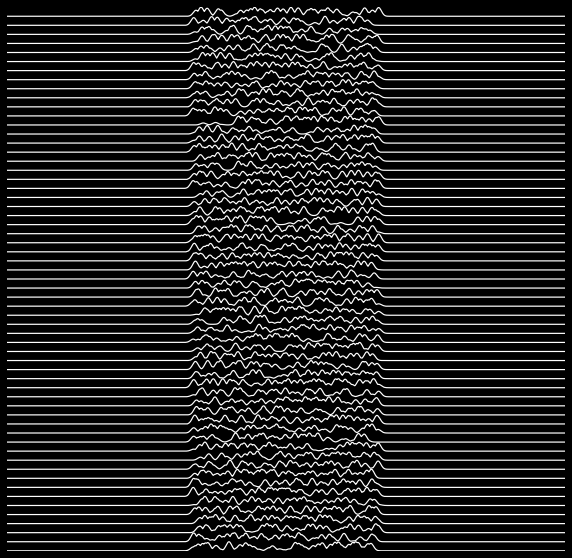

In [75]:
# constants
num_lines = 60
num_samples = 1000
peak_spread = 50
peak_height = 2.5 

# adjustments for normalization and vertical offset to fix top from being cropped from the image
vertical_offset = 0.5
vertical_spacing = 1.5  # reduced vertical spacing to fit within the plot area

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# define the center region where peaks will occur
center_region = (num_samples // 3, 2 * num_samples // 3)

for i in range(num_lines):
    # Generate x values
    x = np.linspace(0, num_samples, num_samples)

    y = np.zeros_like(x)

    # create peaks to only occur in the center
    for j in range(center_region[0], center_region[1]):
        # generate a peak with a set probability
        if np.random.rand() < 0.2:  # higher probability in the center
            peak_width = np.random.randint(10, peak_spread)
            height = np.random.rand() * peak_height
            peak = height * np.exp(-0.5 * (np.arange(-peak_width, peak_width) / 5)**2)
            start = max(0, j - peak_width)
            end = min(num_samples, j + peak_width)
            y[start:end] = np.maximum(y[start:end], peak[0:end-start])

    y = (y / np.max(y)) * vertical_spacing + (i * vertical_spacing)

    ax.plot(x, y, color='white', linewidth=1.2)

ax.set_xlim(0, num_samples)
ax.set_ylim(0, num_lines * vertical_spacing)

ax.set_xticks([])
ax.set_yticks([])

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_aspect('auto')

plt.show()

In [76]:
output_file = '5.png'
fig.savefig(output_file, dpi=300, bbox_inches='tight', pad_inches=0.1, facecolor='black')

plt.close(fig)

output_file

'5.png'

In [34]:
# animated GIF
import matplotlib.animation as animation

num_lines = 60
num_samples = 1000
peak_spread = 50
peak_height = 2.5  
vertical_offset = 0.5
vertical_spacing = 1.5


center_region = (num_samples // 4, 3 * num_samples // 4)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_facecolor('black')
fig.patch.set_facecolor('black')
ax.set_xlim(0, num_samples)
ax.set_ylim(0, num_lines * vertical_spacing)
ax.set_xticks([])
ax.set_yticks([])

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_aspect('auto')

def update(frame):
    ax.clear()
    ax.set_facecolor('black')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xlim(0, num_samples)
    ax.set_ylim(0, num_lines * vertical_spacing)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('auto')

    for i in range(frame):
        x = np.linspace(0, num_samples, num_samples)
        y = np.zeros_like(x)

        for j in range(len(x)):
            if (j < center_region[0] or j > center_region[1]):
                peak_probability = 0.02
            else:
                peak_probability = 0.1

            if np.random.rand() < peak_probability:
                peak_width = np.random.randint(10, peak_spread)
                height = (np.random.rand() * peak_height) * (1.5 if j in range(*center_region) else 1.0)
                peak = height * np.exp(-0.5 * (np.arange(-peak_width, peak_width) / 5)**2)
                start = max(0, j - peak_width)
                end = min(num_samples, j + peak_width)
                y[start:end] = np.maximum(y[start:end], peak[0:end-start])

        y = y - np.min(y) + (vertical_spacing * i)
        ax.plot(x, y, color='white', linewidth=1.2)

ani = animation.FuncAnimation(fig, update, frames=num_lines, interval=50, repeat=False)

ani.save('animated-visualization.gif', writer='imagemagick', fps=20)

plt.close(fig)


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
